In [5]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm


df = pd.read_csv(os.path.join('Database', 'US', 'GOOG-1d-5.csv'), index_col=0, parse_dates=True)
df.index = pd.to_datetime(df.index, utc=True)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

monday_mask = (df.index.weekday == 0)
print (monday_mask)

#print(df.head())

[ True False False ... False False False]


                            OLS Regression Results                            
Dep. Variable:        next_day_return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.288
Date:                Fri, 09 Feb 2024   Prob (F-statistic):              0.257
Time:                        16:37:53   Log-Likelihood:                 3036.8
No. Observations:                1223   AIC:                            -6070.
Df Residuals:                    1221   BIC:                            -6059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0204      0.017      1.187      0.2

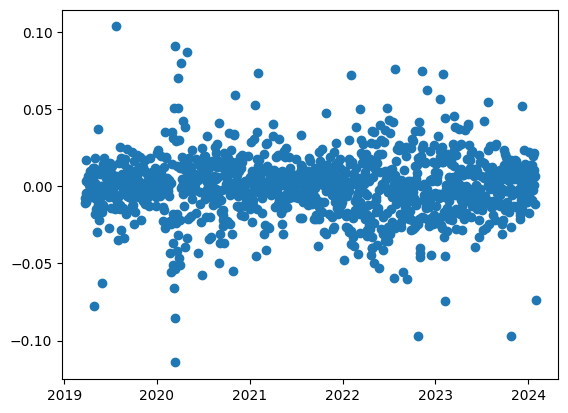

In [57]:
import matplotlib.pyplot as plt
import pandas_ta as ta

# Find the cumulitive return of the past 5 days
df['return'] = df['Close'].pct_change()

# Find the cumulitive return of the past 5 days
df['cum_return_5t'] = df['return'].rolling(5).sum()

# Find the RSI using the pandas_ta
df['rsi'] = ta.rsi(df['Close'])

# Fint the ratio of 5t SMA to 20t SMA
df['sma5'] = df['Close'].rolling(5).mean()
df['sma20'] = df['Close'].rolling(20).mean()
df['sma_ratio'] = df['sma5'] / df['sma20']


# Find the next day return
df['next_day_return'] = df['return'].shift(-1)

df.dropna(inplace=True)

# Create a linear regression model based on the past 5 days return
X = df['sma_ratio']
y = df['next_day_return']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())


residuals = y - predictions

# Plot the histogram of residual
# residuals.hist(bins=20)
# plt.show()


# Scatter Plot the errors vs time
plt.scatter(df.index, residuals)
plt.show()


In [3]:
import os
import pandas as pd

dir = os.path.join("reports","US", 'rsi', "DailyBudget.csv")
df = pd.read_csv(dir, index_col=0, parse_dates=True)

df['return'] = df['PortfolioValue'].pct_change()

daily_return_average = df['return'].mean()

print (daily_return_average)

0.00012019676423935629


35.784351195427924
2.0906601156582205


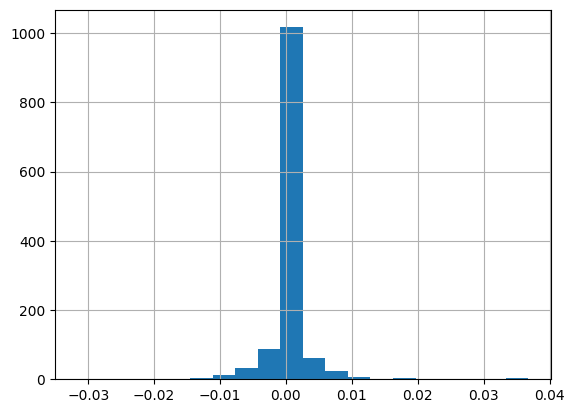

In [8]:
from scipy.stats import kurtosis, skew
import matplotlib.pyplot as plt

returns = df['return'].dropna()

print (kurtosis(returns))
print (skew(returns))


# Plot the histogram of the returns
returns.hist(bins=20)
plt.show()

In [9]:
# Max daily returns
max_daily_return = returns.max()
print (max_daily_return)

# Min daily returns
min_daily_return = returns.min()
print (min_daily_return)

0.0367759615045935
-0.03164291311549572
